# Scikit-learn 활용 머신러닝
### iris 데이터 활용 classification

---

# 수업 내용

## Scikit-learn 활용 머신러닝 입문
iris 데이터를 활용해 classification을 익힘

먼저 분류의 개념부터 알아보자

### 분류(Classification)
머신러닝에서 지도학습을 크게 두 가지로 나누는데 하나는 회귀 다른 하나가 분류이다.
어떤 text를 입력했을 때, 그것이 어떤 class에 속하는지 예측하는 것이다.
크게 이진 분류 (Binary classification)와 다중 분류 (Multi-class classification)로 나눈다.

- 이진 분류 : 예측해야 할 class가 두 가지인 경우이다. 내가 받은 메일이 스팸메일이냐 아니냐 등 예/아니오로 구분되는 문제에 적용된다.
- 다중 분류 : 예측해야 할 class가 여러 가지인 경우이다. 여러가지 class로 분류해야 하는 문제에 적용된다.
    
### 첫번째 작업
1. feature Dataset 확인
2. label (결정값, 타겟, 클래스) 데이터를 확인
3. 데이터 프레임 변환 (데이터프레임 형식이 아니므로)
4. 학습 데이터, 테스트 데이터 분리(train_test_split 활용)
5. 학습을 위한 학습기 - 알고리즘으로 이루어져 있는 객체 (DecisionTreeClassifier로 iris_dtc 만들어줌)
6. 예측 (predict), 수행(.predict)을 하고 예측 정확도 평가

- 추가 : random_state, crietrion에 따라 변화하는 예측 정확도를 확인


### 교차 검증 (Cross Validation)

#### KFold 방식

- 5개의 폴드 세트를 분리하여 각 폴드 세트별 정확도를 담을 리스트를 생성
- n_iter=0으로 주고 for문을 작성해서 학습진행, 예측, 정확도 측정해서
- 교차검증 정확도, 학습데이터 크기, 검증 데이터 크기, 평균검증 정확도를 출력

#### Stratified KFold
- 기존 KFold 의 문제점 다시 한번 확인
- kfold iris 데이터에서 cnt_iter=0으로 주고 for문으로 학습 레이블 데이터 분포, 검증 레이블 데이터 분포를 출력하여 확인
- 레이블 값의 분포를 반영해주지 못하는 문제를 해결하기 위한 StratifiedKFold 이용

## 실습 진행

---

## 1027 수업내용
- cross_val_score()함수를 익힘

### GridSearchCV
- 학습 데이터, 테스트 데이터 분리(train_test_split 활용)
- refit = True : 최적의 하이퍼 파라미터를 찾아서 재학습을 하겠다는 의미
- GridSearchCV를 활용해 grid_gscv_tree 생성 (# 교차검증과 튜닝을 한꺼번에 하는 작업)
- fit을 통해 학습시킴

#### 참고
- 최적의 파라미터(.best_params_)
- 높은 정확도(.best_score_)
- best_estimator_에 predict 해줘서 예측값 측정
- answer, guess, 테스트 세트의 정확도 출력하여 확인

### 유방암 데이터를 활용한 실습
1. 데이터프레임으로 변환
2. train, test 7:3 분리
3. 학습, 예측
4. 학습결과 평가
5. 교차검증
6. GridSearchCV 하이퍼 파라미터 튜닝

### 불순도를 이용한 분류
- criterion (gini, entropy, classification error)
- StandardScaler 를 import
- ***StandardScaler 란???***
    - X_train 평균, 표준편차를 구하기 위해서 표준화



In [1]:
from sklearn.datasets import load_iris
from sklearn.tree        import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy  as np

In [2]:
# 간단한 머신러닝을 구현
import sklearn
print(sklearn.__version__)

0.23.2


In [3]:
# 1. 데이터 로딩
iris = load_iris()
print(type(iris)) 
# 데이터프레임 형식이 아니다.

<class 'sklearn.utils.Bunch'>


In [4]:
keys = iris.keys()
print('dataset keys', keys)

dataset keys dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print( 'key data\n' , iris.data)
print( '*' * 50)
print( 'key target\n' , iris.target)
print( '*' * 50)
print( 'key target_names\n' , iris.target_names)
print( '*' * 50)
print( 'key feature_names\n' , iris.feature_names)
print( '*' * 50)
print( 'key DESCR\n' , iris.DESCR)
print( '*' * 50)

key data
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [

In [6]:
# feature Dataset 확인
# feature : 학습을 위한 데이터
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
# label (결정값, 타겟, 클래스) 데이터를 확인
# label : 답지
iris_label = iris.target
print( iris_label )
print( iris.target_names )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [8]:
# 데이터 프레임 변환
iris_df = pd.DataFrame(data=iris_data,
                      columns=iris.feature_names)
display( iris_df.head() )
iris_df['target'] = iris_label
print('*'*50)
display( iris_df.head() )

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**************************************************


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                     test_size=0.2,
                                                     random_state=20)

print('train data\n', X_train)
print('train data\n', y_train)
print('*'*50)
print('train data\n', X_test)
print('train data\n', y_test)

train data
 [[5.7 3.  4.2 1.2]
 [5.6 3.  4.1 1.3]
 [5.1 3.5 1.4 0.2]
 [5.1 3.8 1.6 0.2]
 [4.8 3.4 1.6 0.2]
 [4.9 2.5 4.5 1.7]
 [6.  3.4 4.5 1.6]
 [4.9 3.  1.4 0.2]
 [6.4 3.2 4.5 1.5]
 [7.4 2.8 6.1 1.9]
 [5.7 2.8 4.5 1.3]
 [6.1 2.6 5.6 1.4]
 [4.9 3.6 1.4 0.1]
 [6.7 3.1 4.4 1.4]
 [6.3 3.3 4.7 1.6]
 [4.7 3.2 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.  3.3 1.4 0.2]
 [5.7 2.5 5.  2. ]
 [5.1 3.8 1.9 0.4]
 [6.4 2.8 5.6 2.2]
 [6.2 3.4 5.4 2.3]
 [5.4 3.4 1.5 0.4]
 [6.3 3.3 6.  2.5]
 [6.  2.2 4.  1. ]
 [5.6 2.9 3.6 1.3]
 [5.6 3.  4.5 1.5]
 [4.5 2.3 1.3 0.3]
 [5.1 3.4 1.5 0.2]
 [5.5 2.4 3.8 1.1]
 [6.2 2.9 4.3 1.3]
 [5.8 2.6 4.  1.2]
 [5.6 2.5 3.9 1.1]
 [6.7 3.1 4.7 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.9 4.2 1.3]
 [5.1 3.3 1.7 0.5]
 [6.2 2.2 4.5 1.5]
 [6.3 2.3 4.4 1.3]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.4 3.  4.5 1.5]
 [5.5 2.3 4.  1.3]
 [6.1 3.  4.6 1.4]
 [5.1 3.8 1.5 0.3]
 [5.3 3.7 1.5 0.2]
 [6.4 3.2 5.3 2.3]
 [5.5 3.5 1.3 0.2]
 [4.8 3.1 1.6 0.2]
 [5.  2.  3.5 1. ]
 [6.  3.  4.8 1.8]
 [5.8 2.7 5.1 1.9]


In [10]:
# 학습을 위한 학습기 - 알고리즘으로 이루어져 있는 객체
iris_dtc = DecisionTreeClassifier(random_state=20 , criterion='entropy')
iris_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=20)

In [11]:
# 예측 (predict) 수행
prediction = iris_dtc.predict(X_test)
print('y_test\n', y_test)
print('prediction\n', prediction)

y_test
 [0 1 1 2 1 1 2 0 2 0 2 1 2 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 2]
prediction
 [0 1 1 2 1 1 2 0 2 0 2 1 1 0 0 2 0 1 2 1 1 2 2 0 1 1 1 0 2 1]


In [12]:
# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.2f}'.format(accuracy_score(y_test, prediction)))

예측 정확도 : 0.93


In [13]:
iris_df = pd.DataFrame(data=iris_data,
                      columns=iris.feature_names)
print( iris_df.head() )
iris_df['target'] = iris_label
print('*'*77)
display( iris_df.head() )

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
*****************************************************************************


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
# 데이터 프레임 형식을 나누는 방법
feature_df = iris_df.iloc[ : , : -1]
display(feature_df.head())
label_df   = iris_df.iloc[ : , -1]
display(label_df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [15]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                     test_size=0.2,
                                                     random_state=11)

print('train data\n', X_train)
print('train data\n', y_train)
print('*'*50)
print('train data\n', X_test)
print('train data\n', y_test)
print(type(X_train), type(X_test), type(y_train), type(y_test),)

train data
 [[5.1 3.5 1.4 0.2]
 [6.9 3.2 5.7 2.3]
 [7.7 2.8 6.7 2. ]
 [5.  3.3 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [7.7 2.6 6.9 2.3]
 [7.6 3.  6.6 2.1]
 [6.7 3.  5.  1.7]
 [5.5 3.5 1.3 0.2]
 [6.  2.7 5.1 1.6]
 [5.  2.  3.5 1. ]
 [7.9 3.8 6.4 2. ]
 [4.6 3.4 1.4 0.3]
 [6.9 3.1 4.9 1.5]
 [6.5 3.  5.8 2.2]
 [5.1 2.5 3.  1.1]
 [6.6 2.9 4.6 1.3]
 [5.  3.2 1.2 0.2]
 [7.4 2.8 6.1 1.9]
 [5.1 3.8 1.6 0.2]
 [6.8 3.2 5.9 2.3]
 [6.9 3.1 5.1 2.3]
 [5.9 3.  4.2 1.5]
 [4.9 2.5 4.5 1.7]
 [6.7 3.1 4.7 1.5]
 [4.4 3.2 1.3 0.2]
 [5.4 3.4 1.7 0.2]
 [6.5 2.8 4.6 1.5]
 [5.1 3.7 1.5 0.4]
 [5.  3.4 1.6 0.4]
 [6.1 2.6 5.6 1.4]
 [6.5 3.  5.5 1.8]
 [6.3 2.5 5.  1.9]
 [5.2 3.4 1.4 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.4 1.5 0.4]
 [6.1 2.8 4.7 1.2]
 [5.1 3.4 1.5 0.2]
 [5.6 3.  4.1 1.3]
 [6.3 2.7 4.9 1.8]
 [7.1 3.  5.9 2.1]
 [5.5 2.6 4.4 1.2]
 [5.  2.3 3.3 1. ]
 [6.3 3.4 5.6 2.4]
 [5.8 2.7 5.1 1.9]
 [5.5 4.2 1.4 0.2]
 [5.6 2.7 4.2 1.3]
 [6.2 2.9 4.3 1.3]
 [6.7 2.5 5.8 1.8]
 [6.1 3.  4.9 1.8]
 [6.7 3.1 5.6 2.4]
 [4.6 3.2 1.4 0.2]


## random_state, crietrion에 따라 변화하는 예측 정확도

In [16]:
# 학습을 위한 학습기 - 알고리즘으로 이루어져 있는 객체
iris_dtc = DecisionTreeClassifier(random_state=20, criterion='gini')
iris_dtc.fit(X_train, y_train)
prediction = iris_dtc.predict(X_test)

# 예측 정확도 평가
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.2f}'.format(accuracy_score(y_test, prediction)))

예측 정확도 : 0.87


## 주의
>학습을 시킬 때 테스트 DataSet을 이용하지 않고 학습 DataSet로만 학습하고 예측하는 경우 예측 정확도가 1.0이 나오므로 예측이라고 볼 수 없다.

>testdata로 하면 안되고 그래서 모델 분할이 필요하다.

In [17]:
bad_iris = load_iris()

# 데이터 세트 분할없이 얻어오기
train_data = iris.data
train_label = iris.target

# 학습을 위한 분류 모델
bad_iris_clf = DecisionTreeClassifier()
bad_iris_clf.fit(train_data, train_label)

# 잘못된 예측
pred = bad_iris_clf.predict(train_data)
print('예측 정확도 : ', accuracy_score(train_label, pred))

예측 정확도 :  1.0


## 교차 검증 (Cross Validation)
>모의고사를 많이 보고 시험을 보는 느낌

### KFold 방식

In [18]:
from sklearn.model_selection import KFold

fold_iris = load_iris()
features = fold_iris.data
# print(features)
label   = fold_iris.target
# print(label)
fold_df_clf = DecisionTreeClassifier()

In [19]:
# 5개의 폴드 세트를 분리하여 각 폴드 세트별 정확도를 담을 리스트를 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('iris shape' , features.shape[0])

iris shape 150


In [20]:
n_iter = 0 
for train_idx , test_idx in kfold.split(features) :
    # print(train_idx , test_idx)
    X_train , X_test = features[train_idx] , features[test_idx]
    # print('X_train\n' , X_train)
    # print('X_test\n' , X_test)
    y_train , y_test = label[train_idx] , label[test_idx]
    # print('y_train\n' , y_train)
    # print( 'y_test\n' , y_test)
    
    # 학습 진행
    fold_df_clf.fit(X_train , y_train)
    # 예측
    fold_pred = fold_df_clf.predict(X_test)
    
    # 정확도 측정
    n_iter += 1
    accuracy = np.round( accuracy_score(y_test , fold_pred) , 4) 
    print('\n{} 교차검증 정확도 : {} , 학습 데이터 크기 : {} , 검증 데이터 크기 : {}'.format(n_iter, accuracy, X_train.shape[0] , X_test.shape[0]))
    
    cv_accuracy.append(accuracy)
print('\n')

print('\n 평균검증 정확도 :  ' , np.mean(cv_accuracy)) 


1 교차검증 정확도 : 1.0 , 학습 데이터 크기 : 120 , 검증 데이터 크기 : 30

2 교차검증 정확도 : 1.0 , 학습 데이터 크기 : 120 , 검증 데이터 크기 : 30

3 교차검증 정확도 : 0.8333 , 학습 데이터 크기 : 120 , 검증 데이터 크기 : 30

4 교차검증 정확도 : 0.9333 , 학습 데이터 크기 : 120 , 검증 데이터 크기 : 30

5 교차검증 정확도 : 0.7333 , 학습 데이터 크기 : 120 , 검증 데이터 크기 : 30



 평균검증 정확도 :   0.89998


### Stratified KFold
>불균형한 분포도를 가진 레이블 데이터 집합을 위한 KFold 방식

>레이블의 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트로 분할

In [21]:
# 기존 KFold 의 문제점 다시 한번 확인

kfold_iris_data = load_iris()
# print("data\n\n" , kfold_iris_data )
kfold_iris_data_df = pd.DataFrame(data=kfold_iris_data.data , columns=kfold_iris_data.feature_names)
kfold_iris_data_df['target'] = kfold_iris_data.target
print(" value_counts : \n" , kfold_iris_data_df['target'].value_counts() )

 value_counts : 
 2    50
1    50
0    50
Name: target, dtype: int64


In [22]:
kfold_iris_data_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
kfold_iris = KFold(n_splits=3)
cnt_iter = 0
for train_idx, test_idx in kfold_iris.split(kfold_iris_data_df) :
    # print(train_idx, test_idx)
    cnt_iter += 1
    label_train = kfold_iris_data_df['target'].iloc[train_idx]
    label_test  = kfold_iris_data_df['target'].iloc[test_idx]
    # print('label_train\n'. label_train)
    print('교차 검증 : {}'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n', label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n', label_test.value_counts())
   

교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    50
1    50
Name: target, dtype: int64
검증 레이블 데이터 분포 : 
 0    50
Name: target, dtype: int64
교차 검증 : 2
학습 레이블 데이터 분포 : 
 2    50
0    50
Name: target, dtype: int64
검증 레이블 데이터 분포 : 
 1    50
Name: target, dtype: int64
교차 검증 : 3
학습 레이블 데이터 분포 : 
 1    50
0    50
Name: target, dtype: int64
검증 레이블 데이터 분포 : 
 2    50
Name: target, dtype: int64


In [24]:
# 레이블 값의 분포를 반영해주지 못하는 문제를 해결하기 위한 StratifiedKFold 이용
from sklearn.model_selection import StratifiedKFold

skf_iris = StratifiedKFold(n_splits=3)
cnt_iter = 0 

for train_idx , test_idx in skf_iris.split(kfold_iris_data_df , kfold_iris_data_df['target']) :
    # print(train_idx , test_idx)
    cnt_iter += 1
    label_train = kfold_iris_data_df['target'].iloc[train_idx]
    label_test  = kfold_iris_data_df['target'].iloc[test_idx]
    # print('label_train\n' , label_train)
    print('교차 검증 : {}'.format(cnt_iter))
    print('학습 레이블 데이터 분포 : \n' , label_train.value_counts())
    print('검증 레이블 데이터 분포 : \n' , label_test.value_counts())

교차 검증 : 1
학습 레이블 데이터 분포 : 
 2    34
1    33
0    33
Name: target, dtype: int64
검증 레이블 데이터 분포 : 
 1    17
0    17
2    16
Name: target, dtype: int64
교차 검증 : 2
학습 레이블 데이터 분포 : 
 1    34
2    33
0    33
Name: target, dtype: int64
검증 레이블 데이터 분포 : 
 2    17
0    17
1    16
Name: target, dtype: int64
교차 검증 : 3
학습 레이블 데이터 분포 : 
 0    34
2    33
1    33
Name: target, dtype: int64
검증 레이블 데이터 분포 : 
 2    17
1    17
0    16
Name: target, dtype: int64


# [실습]
>iris dataset에서 Stratified KFold 를 이용하여 교차검증(3, 5번)을 진행하고 평균정확도를 확인

>Stratifield KFold 는 분류, 회귀 X

>회귀는 연속된 숫자 값이기 때문에 지원하지 않는다.

>random_state = 100

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

# 회귀에서는 지원하지 않는다.
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy  as np

result_iris = load_iris()
result_features = result_iris.data
result_label    = result_iris.target

# 학습기 생성
result_clf = DecisionTreeClassifier(random_state=100)


In [26]:
result_skfold = StratifiedKFold(n_splits=3)
idx_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in result_skfold.split(features, result_label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측 
    result_clf.fit(X_train , y_train)    
    pred = result_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    idx_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(idx_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(idx_iter,test_index))
    cv_accuracy.append(accuracy)



#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.92, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.96, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]


In [27]:
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


## 교차 검증별 정확도: [0.98 0.92 0.96]
## 평균 검증 정확도: 0.9533333333333333


# 201027
- 교차검증을 간단하게 도와주는 함수 : cross_val_score()
- 폴더 세트 설정, 반복을 통한 학습 및 테스트 인덱스 추출, 학습과 예측수행 반환
- cross_val_score(estimater, X, y, scoring, cv)

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree        import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
import pandas as pd
import numpy  as np

In [29]:
cvs_iris = load_iris()
cvs_iris_feature = cvs_iris.data
cvs_iris_label = cvs_iris.target
cvs_iris_dtc = DecisionTreeClassifier(random_state=200)
# random_state : 난수, 설정하지 않으면 실행할 때마다 달라진다.

scoring = cross_val_score(cvs_iris_dtc, cvs_iris_feature, cvs_iris_label, scoring='accuracy', cv=3)
# scoring = cross_validate(cvs_iris_dtc, cvs_iris_feature, cvs_iris_label, scoring='accuracy', cv=3)

print(scoring)

[0.98 0.92 1.  ]


In [30]:
scoring = cross_validate(cvs_iris_dtc, cvs_iris_feature, cvs_iris_label, scoring='accuracy', cv=3)

print('교차 검증 정보 : ', scoring)
print('교차 검증 시간 : ', scoring['fit_time'])
print('*'*50)
print('교차 검증별 정확도 : ', scoring['test_score'])
print('평균 검증   정확도 : ' , np.round(np.mean(scoring['test_score']) , 2 ))

교차 검증 정보 :  {'fit_time': array([0.00099516, 0.00104117, 0.0009985 ]), 'score_time': array([0.00099754, 0.00095868, 0.00056028]), 'test_score': array([0.98, 0.92, 1.  ])}
교차 검증 시간 :  [0.00099516 0.00104117 0.0009985 ]
**************************************************
교차 검증별 정확도 :  [0.98 0.92 1.  ]
평균 검증 정확도 :  0.9666666666666667


>- Hyper Parameter Tuning(하이퍼 파라미터 튜닝)
- GridSearchCV - 교차검증, 튜닝을 한 번에 할 수 있다.
- Decision Tree parameter
- Parameter criterion : 노드 분리하는 기준(gini, entropy)
- Parameter splitter : 노드 분리하는 방법(random, best)
- Parameter max_depth : 트리 모형의 깊이를 의미
- Parameter min_sample_split : 브랜치 노드에서 분리가 일어나기 위한 샘플 수
- Parameter min_sample_leaf: 노드에 필요한 최소한의 샘플 수
- Parameter max_features : 노드를 분리할 때 고려하는 속성의 수(auto, sqrt, log, int, float)
- random_state

## GridSearchCV

In [31]:
from sklearn.datasets import load_iris
from sklearn.tree        import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy  as np

In [32]:
gscv_iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(gscv_iris.data,
                                                     gscv_iris.target,
                                                     test_size=0.2,
                                                     random_state=120)
# X : feature, y : label
gscv_tree = DecisionTreeClassifier()
params = {'criterion'  : ['gini', 'entropy'],
          'splitter'   : ['random', 'best'],
          'max_depth'  : [1,2,3],
          'min_samples_split' : [2,3]}

In [33]:
# refit = True : 최적의 하이퍼 파라미터를 찾아서 재학습을 하겠다는 의미
grid_gscv_tree = GridSearchCV(gscv_tree,
                              param_grid = params, cv=3, refit=True)
# 교차검증과 튜닝을 한꺼번에 하는 작업

In [34]:
# 학습
grid_gscv_tree.fit(X_train, y_train)
grid_gscv_tree.cv_results_
scores_df = pd.DataFrame(grid_gscv_tree.cv_results_)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001205,0.000599,0.000961,0.000031,gini,1,2,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.600,0.65,0.641667,0.031180,23
1,0.001185,0.000304,0.000812,0.000331,gini,1,2,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.675,0.65,0.666667,0.011785,17
2,0.001312,0.000462,0.000657,0.000465,gini,1,3,random,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.675,0.65,0.666667,0.011785,17
3,0.001736,0.000364,0.001028,0.000038,gini,1,3,best,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.675,0.675,0.65,0.666667,0.011785,17
4,0.001555,0.000674,0.000321,0.000455,gini,2,2,random,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.900,0.675,0.85,0.808333,0.096465,16


In [35]:
print('최적의 파라미터 : ', grid_gscv_tree.best_params_)
print('높은 정확도 : ', grid_gscv_tree.best_score_)

최적의 파라미터 :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'random'}
높은 정확도 :  0.9583333333333334


In [36]:
estimator = grid_gscv_tree.best_estimator_
prediction = estimator.predict(X_test)
print('answer : ', y_test)
print('guess  : ', prediction)
print('테스트 세트의 정확도 : ', accuracy_score(y_test, prediction))

answer :  [1 2 1 1 2 0 2 1 1 2 0 1 0 1 1 0 0 0 0 0 2 0 2 0 1 2 1 0 0 0]
guess  :  [1 2 1 1 2 0 2 1 1 2 0 1 0 1 1 0 0 0 0 0 2 0 2 0 1 2 1 0 0 0]
테스트 세트의 정확도 :  1.0


# [실습]

In [37]:
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.tree        import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy  as np

In [38]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
print( 'key data\n' , cancer.data)
print( '*' * 50)
print( 'key target\n' , cancer.target)
print( '*' * 50)
print( 'key target_names\n' , cancer.target_names)
print( '*' * 50)
print( 'key feature_names\n' , cancer.feature_names)
print( '*' * 50)
print( 'key DESCR\n' , cancer.DESCR)
print( '*' * 50)

key data
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
**************************************************
key target
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 

In [40]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [42]:
# train, test 7:3
# 학습, 예측
# 학습결과 평가

# 학습 데이터, 테스트 데이터 분리
cancer_df['target'] = cancer.target
X = cancer_df.iloc[:,:-1]
y = cancer_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 100)
cancer_clf = DecisionTreeClassifier()

# 학습
cancer_clf.fit(X_train, y_train)

# 예측값 저장
y_pred = cancer_clf.predict(X_test)

# 학습결과 평가
print('answer', y_test)
print('guess', y_pred)
print('Train_Accuracy : ', accuracy_score(y_test, y_pred), '\n')

answer 400    0
225    1
321    0
173    1
506    1
380    1
197    0
260    0
40     0
160    1
391    1
417    0
265    0
254    0
308    1
184    0
54     0
267    1
103    1
142    1
157    1
287    1
479    0
219    0
31     0
370    0
420    1
97     1
450    1
189    1
      ..
198    0
240    1
111    1
523    1
547    1
41     0
91     0
1      0
427    1
536    0
43     0
171    0
252    0
447    1
259    0
190    0
23     0
175    1
20     1
338    1
395    1
560    1
448    1
467    1
216    1
100    0
7      0
361    1
343    0
466    1
Name: target, Length: 171, dtype: int32
guess [0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1]
Train_Accuracy :  0.9473684210526315 



In [43]:
# 교차검증


In [44]:
# GridSearchCV 하이퍼 파라미터 튜닝


## 불순도를 이용한 분류
- criterion (gini, entropy, classification error)

In [45]:
from sklearn.datasets import load_iris, load_breast_cancer

from sklearn.tree        import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy  as np

In [46]:
criterion_iris = load_iris()
X = criterion_iris.data[ : ,[2,3]]
# print(X)
y = criterion_iris.target
# print(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

In [48]:
from sklearn.preprocessing import StandardScaler
# X_train 평균, 표준편차를 구하기 위해서 표준화
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train) # traning data의 표준화
X_test_std  = sc.transform(X_test)  # test data의 표준화

In [49]:
criterion_dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
criterion_dtc.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [50]:
y_pred = criterion_dtc.predict(X_test_std)
print('총 테스트 갯수 : %d, 오류 갯수 : %d' % (len(y_test), (y_test != y_pred).sum()))
print('정확도 : %.2f' % accuracy_score(y_test, y_pred))

총 테스트 갯수 : 45, 오류 갯수 : 1
정확도 : 0.98


In [51]:
# 2차원 배열은 병합
# np.vstack
# np.hstack

a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.hstack([a,b])
d = np.vstack([a,b])
print(c)
print("*"*50)
print(d)

[[1 2 5 6]
 [3 4 7 8]]
**************************************************
[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [52]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

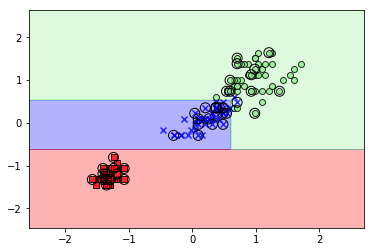

In [53]:
# 불순도 검사
x_combined_std = np.vstack((X_train_std, X_test_std))
# print(x_combined_std)
y_combined = np.hstack((y_train, y_test))
# print(y_combined)
plot_decision_regions(X=x_combined_std,
                     y=y_combined,
                     classifier=criterion_dtc,
                     test_idx=range(105,150))